<a href="https://colab.research.google.com/github/dquintani/vacunacion/blob/main/vacuna_codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DRIVE

In [1]:
directory = ""
# from google.colab import drive
# drive.mount("/drive")
# directory = "/drive/My Drive/Colab Notebooks/vacunacion"


#interactive table
#from vega_datasets import data
#%load_ext google.colab.data_table

# Dependencias

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt

import datetime 
from datetime import date


#dates
import matplotlib.dates as mdates

#mtick for percentages in axes
import matplotlib.ticker as mtick

#colormaps
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import matplotlib.image as mpimg

# Variables y Funciones


In [3]:
#VARIABLES
ordenado = ['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']
color_vac_parcial1 = 	"orange"
color_vac_parcial2 = "orange"
color_vac_completa1 = "green"
color_vac_completa2 = "green"
color_total_dosis1 = "blue"
color_total_dosis2 = "blue"

background_color1 = "#d0d0d0"
background_color2 = "w"

atribucion = "Datos del Ministerio de Salud vía @mauforonda y @BolCuantas. Visualización de BoliGráfica"

In [4]:
def annotate_bar(series, axis, text_color="black", fontsize=12, x_offset=0, y_offset=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  for p in axs[axis].patches:
    axs[axis].annotate(start_text + str(p.get_width()) + end_text,
        xy = (p.get_width() + x_offset, p.get_y() + y_offset),
        fontsize = fontsize,
         color = text_color,
          bbox={
            'edgecolor': edgecolor,
            'facecolor': facecolor, 
            'alpha': alpha}
           )


def annotate_last_flat(df, column_index, axis = 0, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5,start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

def annotate_last_nonflat(df, column_index, axis, text_color="black", fontsize=12, offset_days=0, edgecolor="black", facecolor="white", alpha=0.5, start_text="", end_text=""):
  axs[axis].annotate(start_text + str(df.iloc[-1, column_index]) + end_text, 
           xy = (df.index[-1] + datetime.timedelta(days=offset_days), df.iloc[-1,column_index]),
           fontsize=fontsize,
           color=text_color,
           bbox = {"edgecolor":edgecolor,
                   "facecolor":facecolor,
                   "alpha":alpha}
           )

# Consolidar Base de Datos


## habitantes

In [5]:
habitantes = pd.read_csv("https://raw.githubusercontent.com/dquintani/covid/main/habitantes.csv",index_col = 0)
habitantes = habitantes[['Bolivia', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosí', 'Chuquisaca','Tarija','Beni','Pando']]
#habitantes = habitantes[habitantes.columns].apply(pd.to_numeric, errors = "coerce")

#habitantes.to_csv(directory + "habitantes.csv")
habitantes


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
NaN,11620000,2927000,2029000,3370000,538000,902000,637000,583000,480000,154000


## importar BolCuantas

In [6]:
url1_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=0&single=true&output=csv"
url2_BC = "https://docs.google.com/spreadsheets/d/e/2PACX-1vS1GavkhNJ3z6aF83fOVHMJTtkfZ71Pianv4O6Qvq5xutWh3hSoNqMVF5ZBo0mj8Vw5oOBbs7t_fymK/pub?gid=2002090716&single=true&output=csv"

In [7]:
primeras_BC = pd.read_csv(url1_BC, index_col=0)
primeras_BC = primeras_BC[ordenado]#.fillna(0)
#primeras_BC.index = pd.to_datetime(primeras_BC.index, format= "%Y-%M-%d")
primeras_BC

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,3560.0,361.0,687.0,1264.0,106.0,203.0,303.0,200.0,48.0,388.0
2021-02-04,5172.0,1030.0,1044.0,1393.0,195.0,293.0,304.0,362.0,63.0,488.0
2021-02-05,7430.0,1783.0,1369.0,1638.0,300.0,396.0,529.0,711.0,154.0,550.0
2021-02-06,7636.0,1859.0,1369.0,1638.0,412.0,396.0,530.0,712.0,170.0,550.0
2021-02-07,7752.0,1859.0,1369.0,1638.0,499.0,396.0,530.0,712.0,199.0,550.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-29,2863296.0,668458.0,519941.0,866725.0,143772.0,138068.0,174125.0,200698.0,109305.0,42204.0
2021-07-30,2874284.0,669268.0,521181.0,872172.0,144518.0,138351.0,174918.0,201716.0,109890.0,42270.0
2021-07-31,2878065.0,669530.0,521497.0,874033.0,144878.0,138440.0,175238.0,202275.0,109901.0,42273.0


In [8]:
segundas_BC = pd.read_csv(url2_BC, index_col=0)
segundas_BC = segundas_BC[ordenado]#.fillna(0)
#segundas_BC.index = pd.to_datetime(segundas_BC.index, format= "%Y-%M-%d") 

segundas_BC

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-29,1563658.0,377094.0,271202.0,535998.0,70043.0,63652.0,77845.0,102514.0,42760.0,22550.0
2021-07-30,1613610.0,392602.0,285005.0,546945.0,71305.0,66322.0,80008.0,105669.0,43059.0,22695.0
2021-07-31,1627394.0,397033.0,288576.0,549352.0,71725.0,67524.0,80703.0,106698.0,43086.0,22697.0


## importar mauforonda


In [9]:
url1_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/primera.csv"
url2_MF = "https://raw.githubusercontent.com/mauforonda/vacunas/master/datos/segunda.csv"

In [10]:
primeras_MF = pd.read_csv(url1_MF, index_col=0)
primeras_MF = primeras_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
primeras_MF = primeras_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#primeras_MF.index = pd.to_datetime(primeras_MF.index) 

primeras_MF

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,3560.0,361.0,687.0,1264.0,106.0,203.0,303.0,200.0,48.0,388.0
2021-02-04,5172.0,1030.0,1044.0,1393.0,195.0,293.0,304.0,362.0,63.0,488.0
2021-02-05,7430.0,1783.0,1369.0,1638.0,300.0,396.0,529.0,711.0,154.0,550.0
2021-02-06,7636.0,1859.0,1369.0,1638.0,412.0,396.0,530.0,712.0,170.0,550.0
2021-02-07,7752.0,1859.0,1369.0,1638.0,499.0,396.0,530.0,712.0,199.0,550.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,2528672.0,604986.0,453988.0,757929.0,128125.0,122700.0,150124.0,169804.0,100446.0,40570.0
2021-07-16,2568957.0,605422.0,461793.0,778170.0,130128.0,124668.0,153351.0,173189.0,101448.0,40788.0
2021-07-17,2574283.0,606804.0,465406.0,773871.0,130582.0,125419.0,154925.0,174760.0,101645.0,40871.0


In [11]:
segundas_MF = pd.read_csv(url2_MF, index_col=0)
segundas_MF = segundas_MF[['Total', 'La Paz','Cochabamba','Santa Cruz', 'Oruro', 'Potosi', 'Chuquisaca','Tarija','Beni','Pando']].fillna(0)
segundas_MF = segundas_MF.rename(columns={"Total": "Bolivia", "Potosi": "Potosí"})
#segundas_MF.index = pd.to_datetime(segundas_MF.index) 


segundas_MF

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-07-15,866647.0,217837.0,171603.0,230214.0,48864.0,40441.0,53214.0,55666.0,33688.0,15120.0
2021-07-16,895479.0,218058.0,178364.0,243481.0,50393.0,41158.0,55318.0,58768.0,34231.0,15708.0
2021-07-17,917488.0,220090.0,178841.0,258928.0,51584.0,41395.0,55858.0,60492.0,34345.0,15955.0


## ¿Cual base de datos está más actualizada?

In [12]:
print("bolcuantas dias = " + "{}".format(len(primeras_BC)))
print("maufronda dias= " + "{}".format(len(primeras_MF)))
if len(primeras_BC) > len(primeras_MF):
  primeras = primeras_BC
  segundas = segundas_BC
  print("BolCuantas más actualizada, activada ñie")
elif len(primeras_BC) < len(primeras_MF):
  primeras = primeras_MF
  segundas = segundas_MF
  print("mauforonda más actualizada, activada ñie")

elif len(primeras_BC) == len(primeras_MF):
  primeras = primeras_MF
  segundas = segundas_MF
  print("ambas igual de actualizadas, mauforonda activada ñie")

bolcuantas dias = 181
maufronda dias= 167
BolCuantas más actualizada, activada ñie


## Consolidar

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-29,4426954.0,1045552.0,791143.0,1402723.0,213815.0,201720.0,251970.0,303212.0,152065.0,64754.0
2021-07-30,4487894.0,1061870.0,806186.0,1419117.0,215823.0,204673.0,254926.0,307385.0,152949.0,64965.0
2021-07-31,4505459.0,1066563.0,810073.0,1423385.0,216603.0,205964.0,255941.0,308973.0,152987.0,64970.0


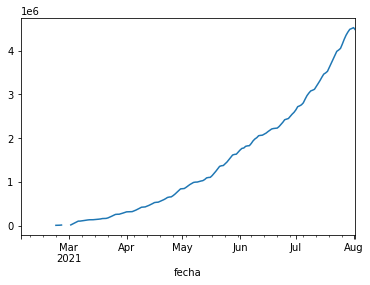

In [13]:
#DOSIS ACUMULADAS TOTAL
primeras_acum = primeras
segundas_acum = segundas
ambas_acum = (primeras + segundas)

primeras_acum.index = pd.to_datetime(primeras_acum.index) 
segundas_acum.index = pd.to_datetime(segundas_acum.index)
ambas_acum.index = pd.to_datetime(ambas_acum.index)

ambas_acum.Bolivia.plot()
ambas_acum

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-29,38.097711,35.720943,38.991769,41.623828,39.742565,22.363636,39.555730,52.008919,31.680208,42.048052
2021-07-30,38.622151,36.278442,39.733169,42.110297,40.115799,22.691020,40.019780,52.724700,31.864375,42.185065
2021-07-31,38.773313,36.438777,39.924741,42.236944,40.260781,22.834146,40.179121,52.997084,31.872292,42.188312


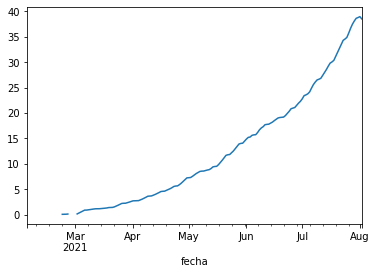

In [14]:
#DOSIS ACUMULADAS POR CADA 100 habitantes
primeras_acum_pc = primeras_acum.div(habitantes.iloc[0])*100
segundas_acum_pc = segundas_acum.div(habitantes.iloc[0])*100
ambas_acum_pc = ambas_acum.div(habitantes.iloc[0]) * 100


ambas_acum_pc.Bolivia.plot()
ambas_acum_pc


,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


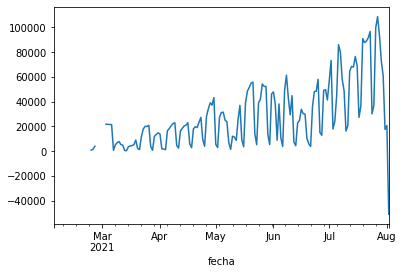

In [15]:
#DOSIS DIARIAS TOTAL
primeras_dia = primeras_acum.diff()
segundas_dia =  segundas_acum.diff()
ambas_dia = ambas_acum.diff()

ambas_dia.Bolivia.plot()
ambas_dia[10:30]

,Bolivia,La Paz,Cochabamba,Santa Cruz,Oruro,Potosí,Chuquisaca,Tarija,Beni,Pando
fecha,,,,,,,,,,
2021-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-07-29,0.627599,0.556372,0.912272,0.759377,0.371933,0.193570,0.384772,0.906346,0.174583,0.143506
2021-07-30,0.524441,0.557499,0.741400,0.486469,0.373234,0.327384,0.464050,0.715780,0.184167,0.137013
2021-07-31,0.151162,0.160335,0.191572,0.126647,0.144981,0.143126,0.159341,0.272384,0.007917,0.003247


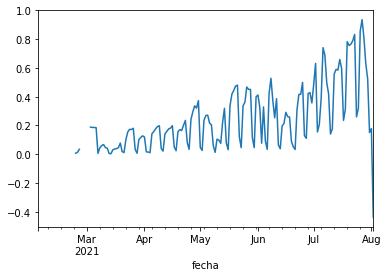

In [16]:
# DIARIAS POR CADA 100 HABITANTES
primeras_dia_pc = primeras_dia.div(habitantes.iloc[0])*100
segundas_dia_pc = segundas_dia.div(habitantes.iloc[0])*100

ambas_dia_pc = ambas_dia.div(habitantes.iloc[0])*100

ambas_dia_pc.Bolivia.plot()
ambas_dia_pc

In [17]:
#RESUMEN NACIONAL
vacunacion_BO_df = pd.concat([primeras_dia.Bolivia,
                              primeras_acum.Bolivia,
                              primeras_acum_pc.Bolivia,
                              segundas_dia.Bolivia,
                              segundas_acum.Bolivia,
                              segundas_acum_pc.Bolivia,
                              ambas_dia.Bolivia,
                              ambas_acum.Bolivia,
                              ambas_acum_pc.Bolivia,
                              ], 
                             axis=1, 
                             keys = ["Primeras Dosis Diarias", 
                                     "Primeras Dosis Acumulado", 
                                     "Primeras Dosis Acumulado, % poblacion",
                                     "Segundas y Janssen Diarias",
                                     "Segundas y Janssen Acumulada", 
                                     "Segundas y Janssen Acumulado, % Poblacion",
                                     "Dosis Todas Diarias",
                                     "Dosis Todas Acumuladas"])

vacunacion_BO_df

,Primeras Dosis Diarias,Primeras Dosis Acumulado,"Primeras Dosis Acumulado, % poblacion",Segundas y Janssen Diarias,Segundas y Janssen Acumulada,"Segundas y Janssen Acumulado, % Poblacion",Dosis Todas Diarias,Dosis Todas Acumuladas
fecha,,,,,,,,
2021-02-03,NaN,3560.0,0.030637,NaN,NaN,NaN,NaN,NaN
2021-02-04,1612.0,5172.0,0.044509,NaN,NaN,NaN,NaN,NaN
2021-02-05,2258.0,7430.0,0.063941,NaN,NaN,NaN,NaN,NaN
2021-02-06,206.0,7636.0,0.065714,NaN,NaN,NaN,NaN,NaN
2021-02-07,116.0,7752.0,0.066713,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-07-29,11965.0,2863296.0,24.641102,60962.0,1563658.0,13.456609,72927.0,4426954.0
2021-07-30,10988.0,2874284.0,24.735663,49952.0,1613610.0,13.886489,60940.0,4487894.0
2021-07-31,3781.0,2878065.0,24.768201,13784.0,1627394.0,14.005112,17565.0,4505459.0


#Guardar Datos en .CSV

In [18]:
folder=""

primeras_acum.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Acumuladas.csv")
primeras_acum_pc.round(2).to_csv(directory + folder + "Primeras_Acumuladas_PorCada100Hab.csv")
primeras_dia.fillna(0).astype(int).to_csv(directory + folder + "Primeras_Diario.csv")
primeras_dia_pc.round(2).to_csv(directory + folder + "Primeras_Diario_PorCada100Hab.csv")

segundas_acum.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Acumuladas.csv")
segundas_acum_pc.round(2).to_csv(directory + folder + "Segundas_Acumuladas_PorCada100Hab.csv")
segundas_dia.fillna(0).astype(int).to_csv(directory + folder + "Segundas_Diario.csv")
segundas_dia_pc.round(2).to_csv(directory + folder + "Segundas_Diario_PorCada100Hab.csv")

ambas_acum.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Acumuladas.csv")
ambas_acum_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Acumuladas_PorCada100Hab.csv")
ambas_dia.fillna(0).astype(int).to_csv(directory + folder + "Dosis_Todas_Diarias.csv")
ambas_dia_pc.round(2).to_csv(directory + folder + "Dosis_Todas_Diarias_PorCada100Hab.csv")

vacunacion_BO_df.round(1).to_csv(directory + folder + "Resumen_Nacional_Bolivia_Vacuna.csv")

## #Ultima Actualización

In [19]:
ultima_actualizacion = "última actualización: {}".format(primeras_acum.index[-1].date())
ultima_actualizacion

'última actualización: 2021-08-02'

# Gráficas


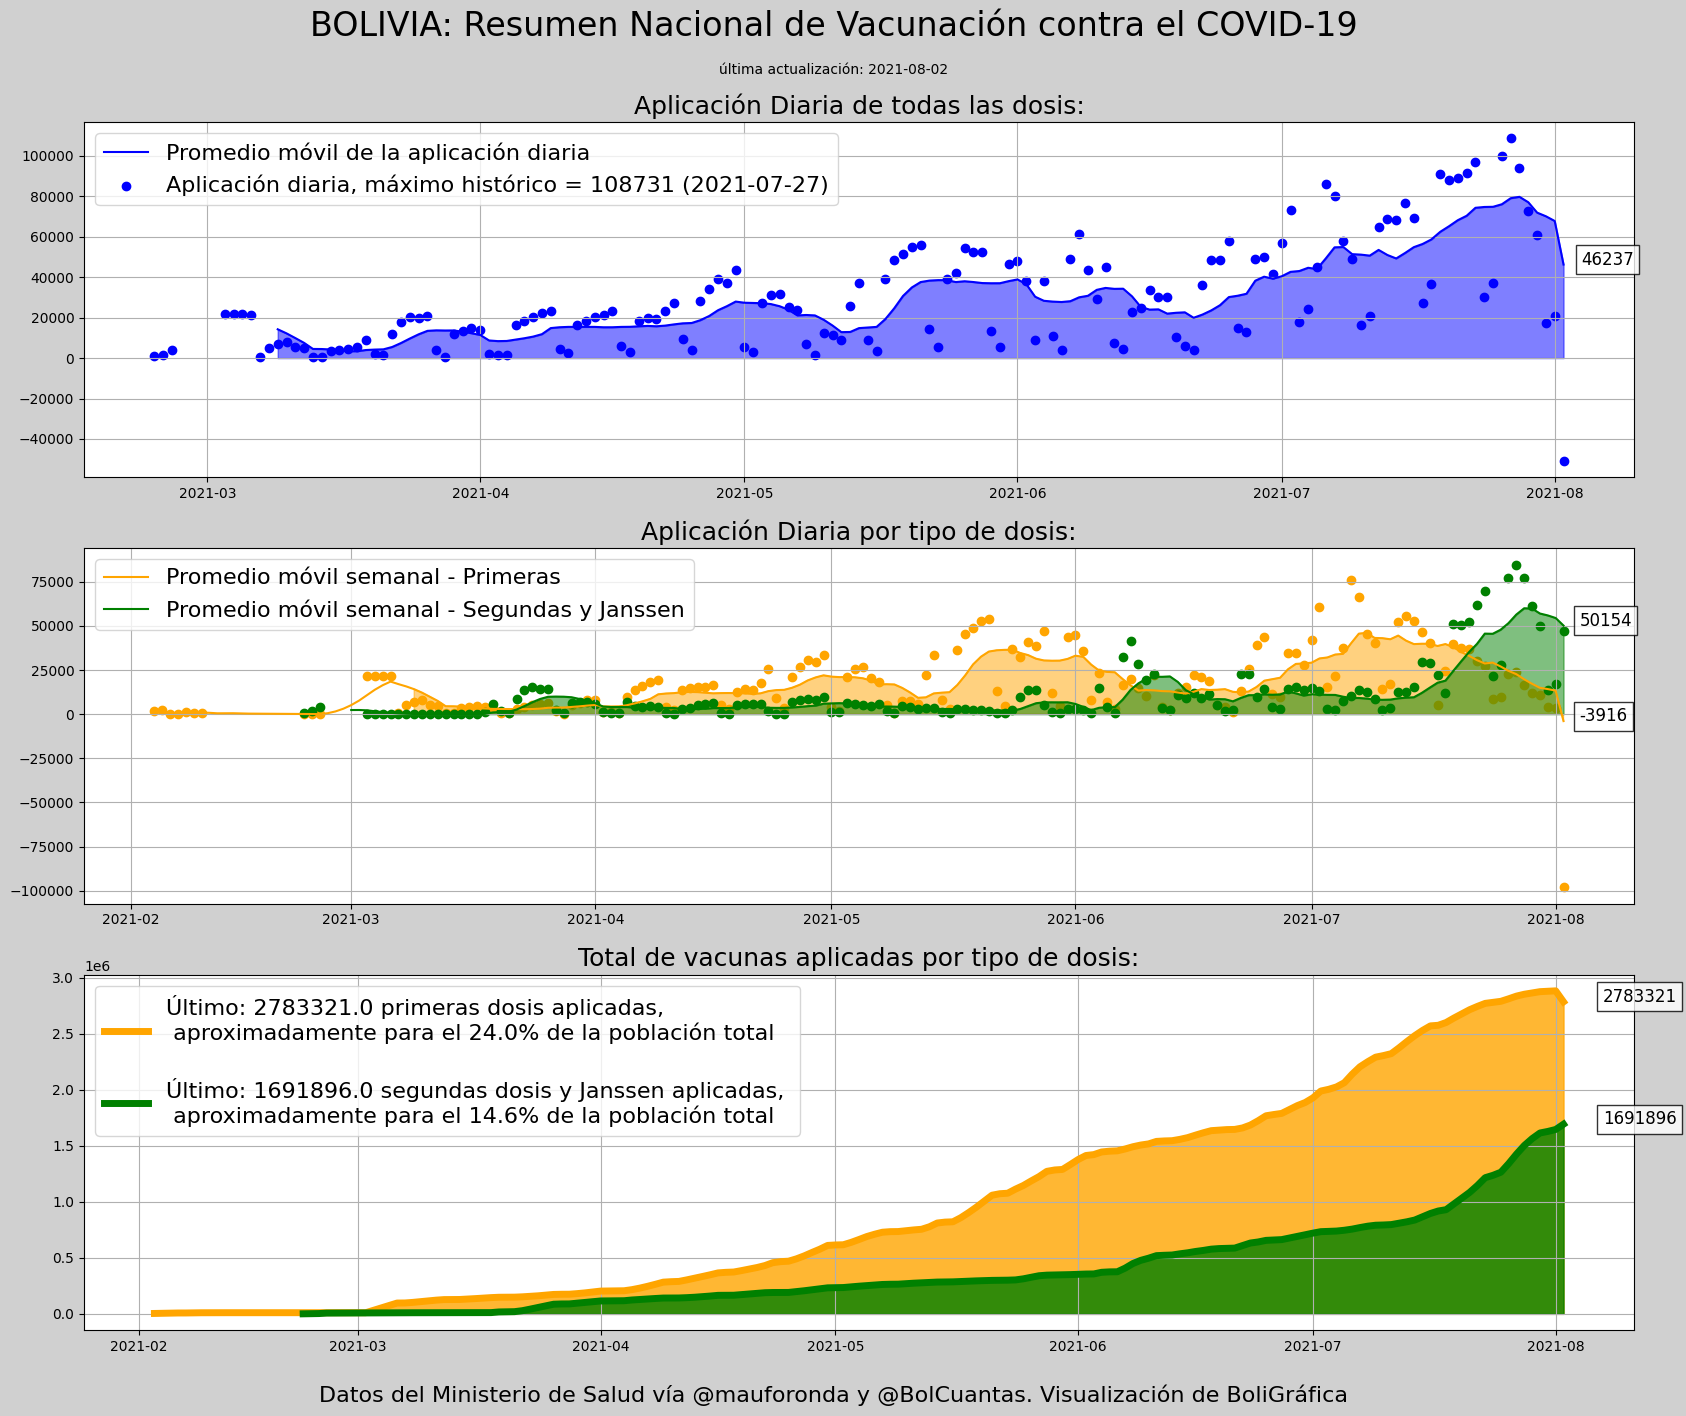

In [20]:
fig, axs = plt.subplots(3,1, sharex=False,
                        figsize=(20,16),
                        dpi=100
                        )

axs = axs.flatten()

fig.suptitle("BOLIVIA: Resumen Nacional de Vacunación contra el COVID-19", fontsize = 24, y=.95)
fig.text(0.5,.91,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.08,horizontalalignment='center',s=atribucion, fontsize=16)

fig.set_facecolor(background_color1)




axs[0].grid()
axs[0].set_title("Aplicación Diaria de todas las dosis:", fontsize=18)
axs[0].scatter(ambas_dia.index, ambas_dia.Bolivia, color=color_total_dosis1, label="Aplicación diaria, máximo histórico = {} ({})".format(ambas_dia.Bolivia.fillna(0).astype(int).max(), ambas_dia.Bolivia.idxmax().date())) 
axs[0].plot(ambas_dia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2,label="Promedio móvil de la aplicación diaria")
axs[0].fill_between(ambas_dia.Bolivia.index, ambas_dia.Bolivia.rolling(7).mean(), color=color_total_dosis2, alpha=.5)
axs[0].legend(fontsize=16)
annotate_last_flat(df=ambas_dia.rolling(7).mean().fillna(0).astype(int), column_index=0, axis = 0, offset_days=2, alpha=.8)



axs[1].grid()
axs[1].set_title("Aplicación Diaria por tipo de dosis:", fontsize=18)
axs[1].scatter(primeras_dia.index, primeras_dia.Bolivia, color=color_vac_parcial1) 
axs[1].plot(primeras_dia.index, primeras_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_parcial2, label="Promedio móvil semanal - Primeras")
axs[1].fill_between(primeras_dia.Bolivia.index, primeras_dia.Bolivia.rolling(7).mean(), color=color_vac_parcial2, alpha=.5)
annotate_last_flat(df=primeras_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)

axs[1].scatter(segundas_dia.index, segundas_dia.Bolivia, color=color_vac_completa1) 
axs[1].plot(segundas_dia.index, segundas_dia.Bolivia.interpolate().rolling(7).mean(), color=color_vac_completa2,label="Promedio móvil semanal - Segundas y Janssen")
axs[1].fill_between(segundas_dia.Bolivia.index, segundas_dia.Bolivia.rolling(7).mean(), color=color_vac_completa2, alpha=.5)
axs[1].legend(fontsize=16)
annotate_last_flat(df=segundas_dia.rolling(7).mean().round().fillna(0).astype(int), column_index=0, axis = 1, offset_days=2, alpha=.8)





axs[2].grid()
axs[2].set_title("Total de vacunas aplicadas por tipo de dosis:", fontsize=18)
axs[2].plot(primeras_acum.Bolivia.interpolate(), color=color_vac_parcial2, linewidth=5, 
            label="Último: {} primeras dosis aplicadas, \n aproximadamente para el {}% de la población total \n".format(primeras_acum.Bolivia[-1],primeras_acum_pc.Bolivia[-1].round(1)))
axs[2].fill_between(primeras_acum.Bolivia.index, primeras_acum.Bolivia.interpolate(), color=color_vac_parcial1, alpha=.8)

annotate_last_flat(df=primeras_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=5, alpha=.8,
                   #end_text="{} segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round())
                   )

axs[2].plot(segundas_acum.Bolivia.interpolate(), color=color_vac_completa2,linewidth=5, 
            label="Último: {} segundas dosis y Janssen aplicadas, \n aproximadamente para el {}% de la población total".format(segundas_acum.Bolivia[-1],segundas_acum_pc.Bolivia[-1].round(1)))
axs[2].fill_between(segundas_acum.Bolivia.index, segundas_acum.Bolivia.interpolate(), color=color_vac_completa1, alpha=.8)
axs[2].legend(fontsize=16)
annotate_last_flat(df=segundas_acum.fillna(0).astype(int), column_index=0, axis = 2, offset_days=5, alpha=.8,
                    #end_text=" segundas dosis y Janssen aplicadas, lo cual cubre \n aproximadamente el {}% de la población total".format(segundas_acum_pc.Bolivia[-1].round())
                    )

fig.savefig(directory + "resumen_nacional.jpg", bbox_inches="tight")

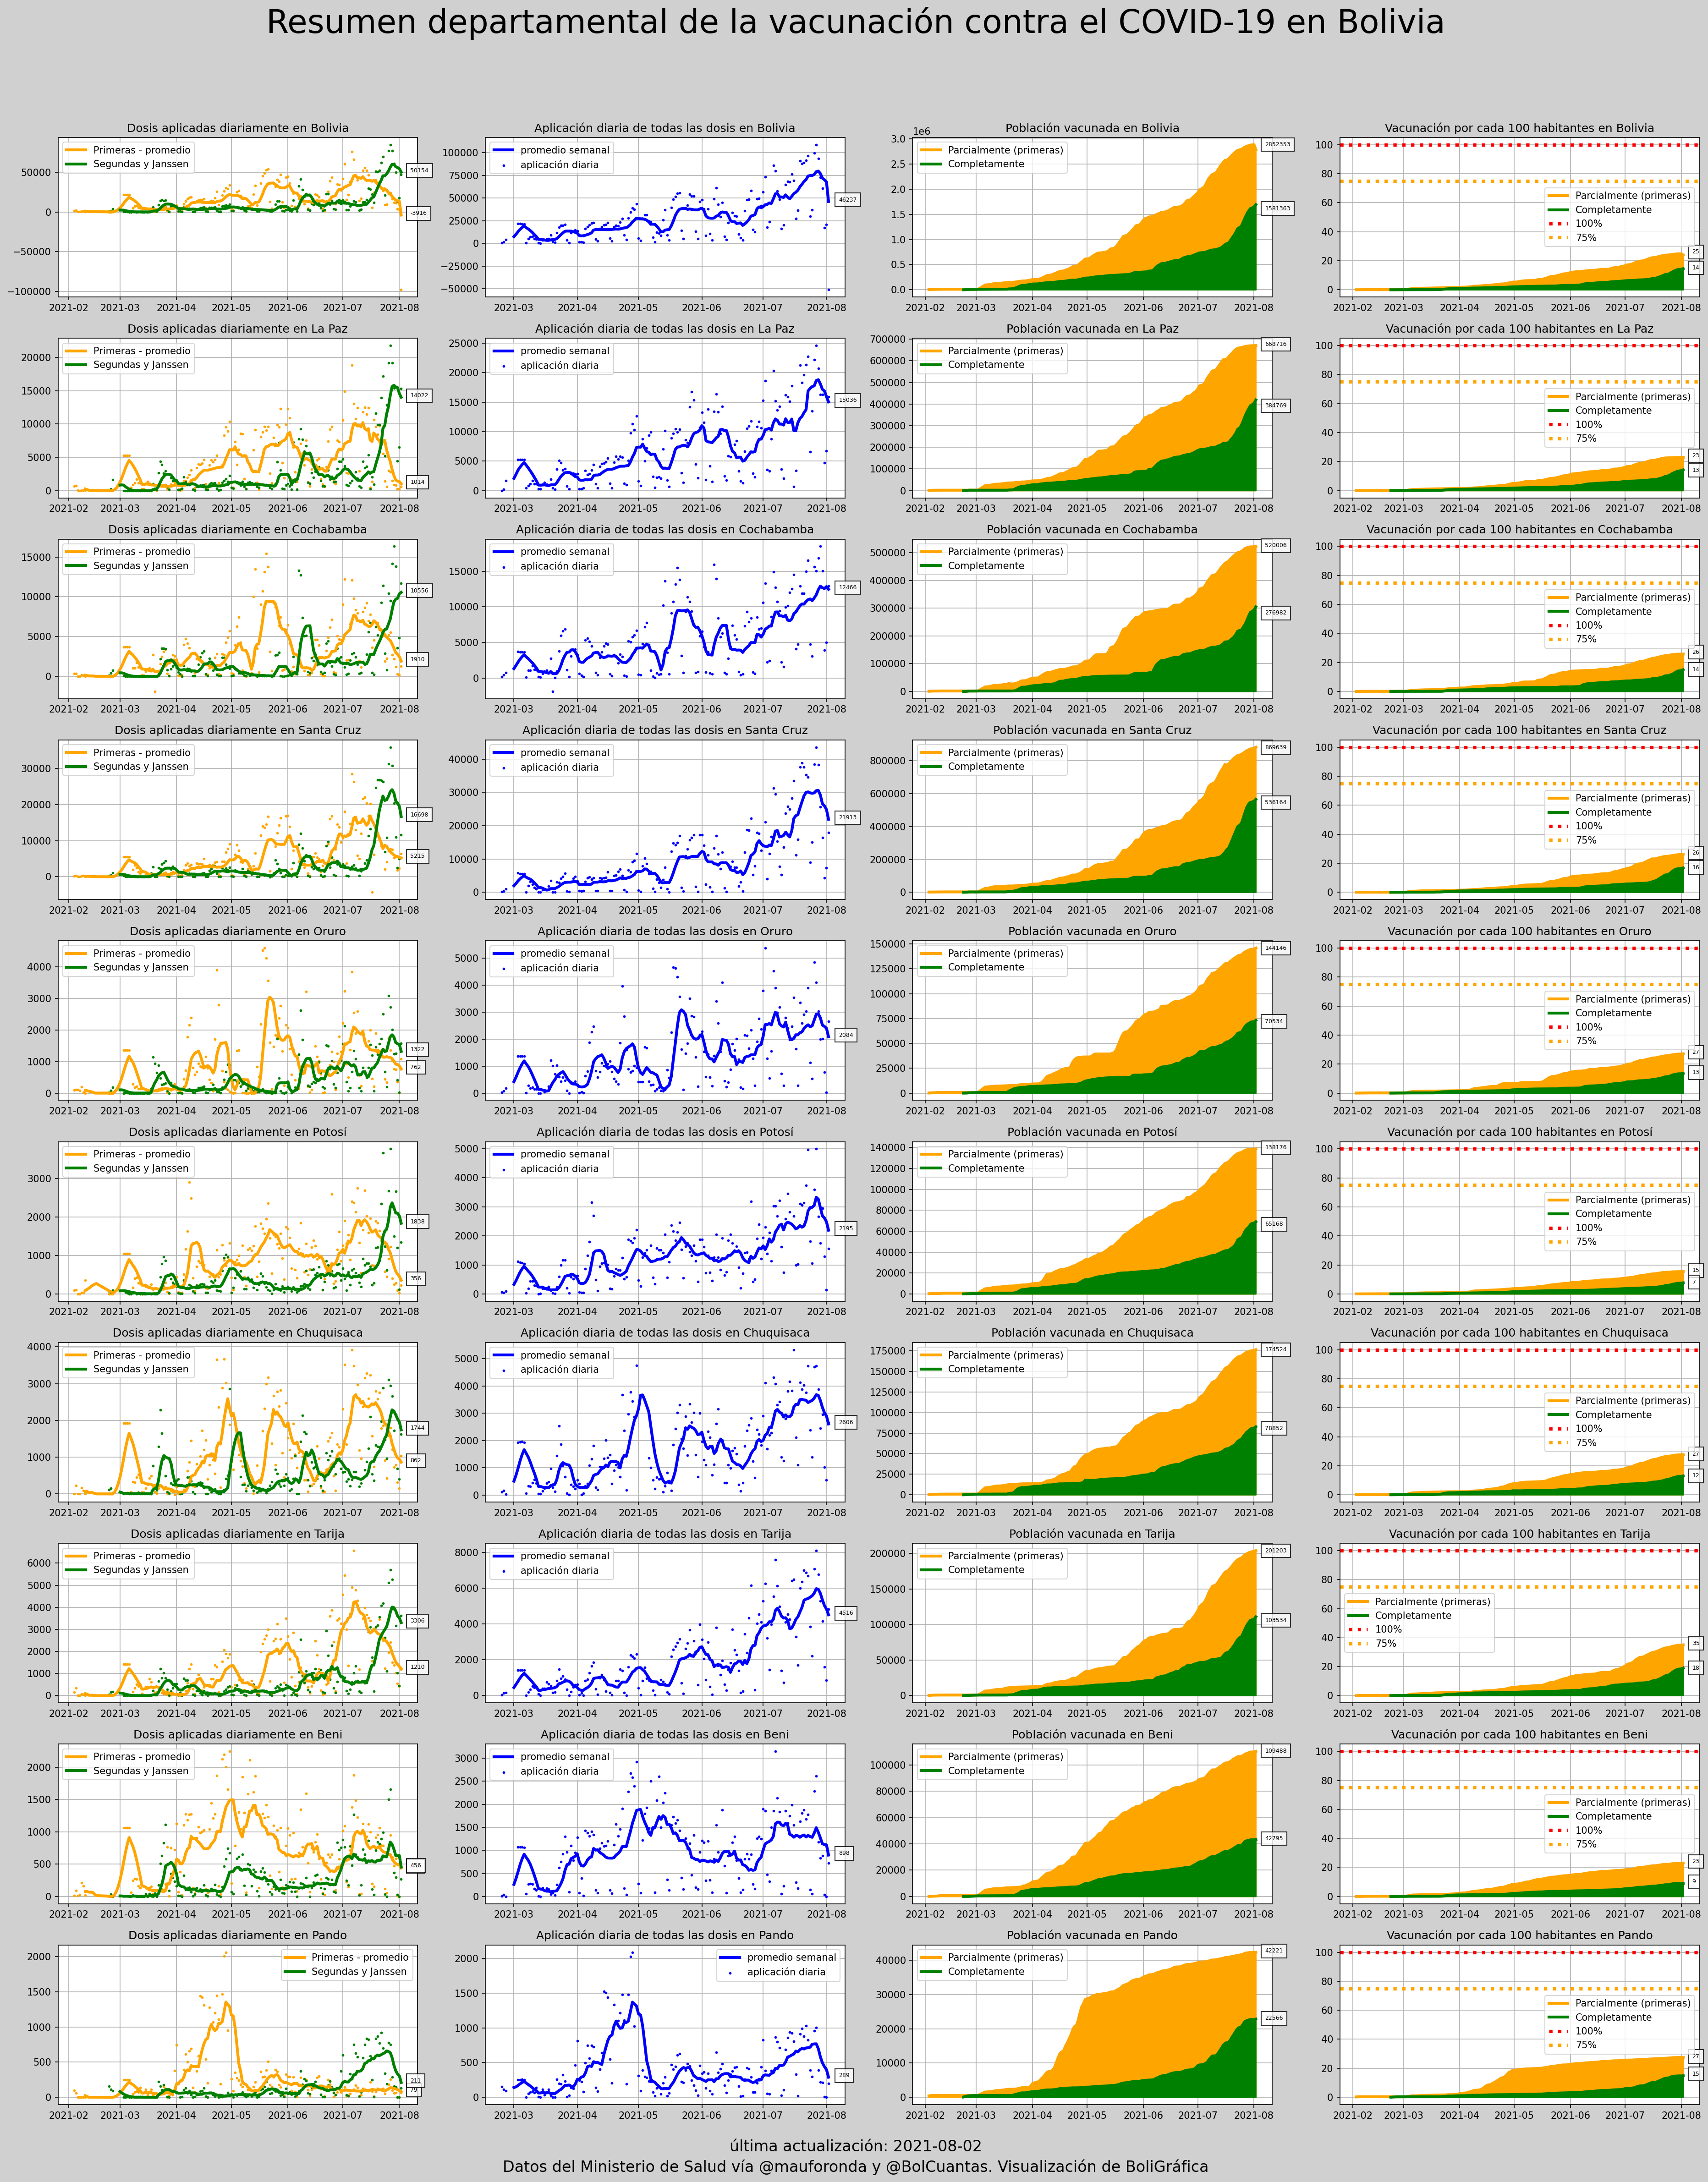

In [21]:
fig, axs = plt.subplots(10,4, figsize = (25,30),
                        dpi = 150
                        )
#axs = axs.flatten()
fig.suptitle("Resumen departamental de la vacunación contra el COVID-19 en Bolivia", y=1.03, fontsize = 34)
fig.text(0.5,-.01,horizontalalignment='center',s=ultima_actualizacion, fontsize=16)
fig.text(0.5,-.02,horizontalalignment='center',s=atribucion, fontsize=16)

fig.set_facecolor(background_color1)



for i in range(10):
  axs[i,0].grid(zorder=1)
  axs[i,0].set_title("Dosis aplicadas diariamente en {}".format(primeras_dia.columns[i]))
  axs[i,0].scatter(primeras_dia.index, primeras_dia.iloc[:,i], color = color_vac_parcial1, s=3, zorder=2)
  axs[i,0].plot(primeras_dia.index, primeras_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_parcial2, label="Primeras - promedio", linewidth = 3, zorder=3)
  axs[i,0].scatter(segundas_dia.index, segundas_dia.iloc[:,i], color = color_vac_completa1, s=3, zorder=2)
  axs[i,0].plot(segundas_dia.index, segundas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_vac_completa2, label="Segundas y Janssen", linewidth = 3, zorder=3)  
  axs[i,0].legend()
  annotate_last_nonflat(primeras_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,0), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)


for i in range(10):
  axs[i,1].grid(zorder=1)
  axs[i,1].set_title("Aplicación diaria de todas las dosis en {}".format(primeras_dia.columns[i]))
  axs[i,1].scatter(ambas_dia.index, ambas_dia.iloc[:,i], color = color_total_dosis1, label="aplicación diaria", s=3, zorder=2)
  axs[i,1].plot(ambas_dia.index, ambas_dia.iloc[:,i].interpolate().rolling(7).mean(),color = color_total_dosis2, label="promedio semanal", linewidth = 3, zorder=3)
  axs[i,1].legend()
  annotate_last_nonflat(ambas_dia.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,1), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)


for i in range(10):
  axs[i,2].grid(zorder=1)
  axs[i,2].set_title("Población vacunada en {}".format(primeras_dia.columns[i]))
  axs[i,2].plot(primeras_acum.iloc[:,i].interpolate(), label = "Parcialmente (primeras)", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,2].fill_between(primeras_acum.index, primeras_acum.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,2].plot(segundas_acum.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,2].fill_between(segundas_acum.index, segundas_acum.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,2].legend()
  annotate_last_nonflat(primeras_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,2), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

for i in range(10):
  axs[i,3].grid(zorder=1)
  axs[i,3].set_title("Vacunación por cada 100 habitantes en {}".format(primeras_dia.columns[i]))
  axs[i,3].plot(primeras_acum_pc.iloc[:,i].interpolate(), label = "Parcialmente (primeras)", color= color_vac_parcial2, linewidth = 3, zorder=2)
  axs[i,3].fill_between(primeras_acum_pc.index, primeras_acum_pc.iloc[:,i].interpolate(),color= color_vac_parcial1,zorder=2)
  axs[i,3].plot(segundas_acum_pc.iloc[:,i].interpolate(), label = "Completamente",color= color_vac_completa2, linewidth = 3, zorder=3)
  axs[i,3].fill_between(segundas_acum_pc.index, segundas_acum_pc.iloc[:,i].interpolate(),color= color_vac_completa1, zorder=3)
  axs[i,3].axhline(y=100, color='red', linestyle='dotted',label="100%", linewidth=3.5)
  axs[i,3].axhline(y=75, color='orange', linestyle='dotted',label="75%", linewidth=3.5)
  axs[i,3].legend()
  annotate_last_nonflat(primeras_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)
  annotate_last_nonflat(segundas_acum_pc.rolling(7).mean().round().fillna(0).astype(int), i, axis=(i,3), text_color="black", fontsize=6, offset_days=5, edgecolor="black", facecolor="white", alpha=0.8)

fig.tight_layout()

fig.savefig(directory + "resumen_detallado.jpg", bbox_inches="tight")

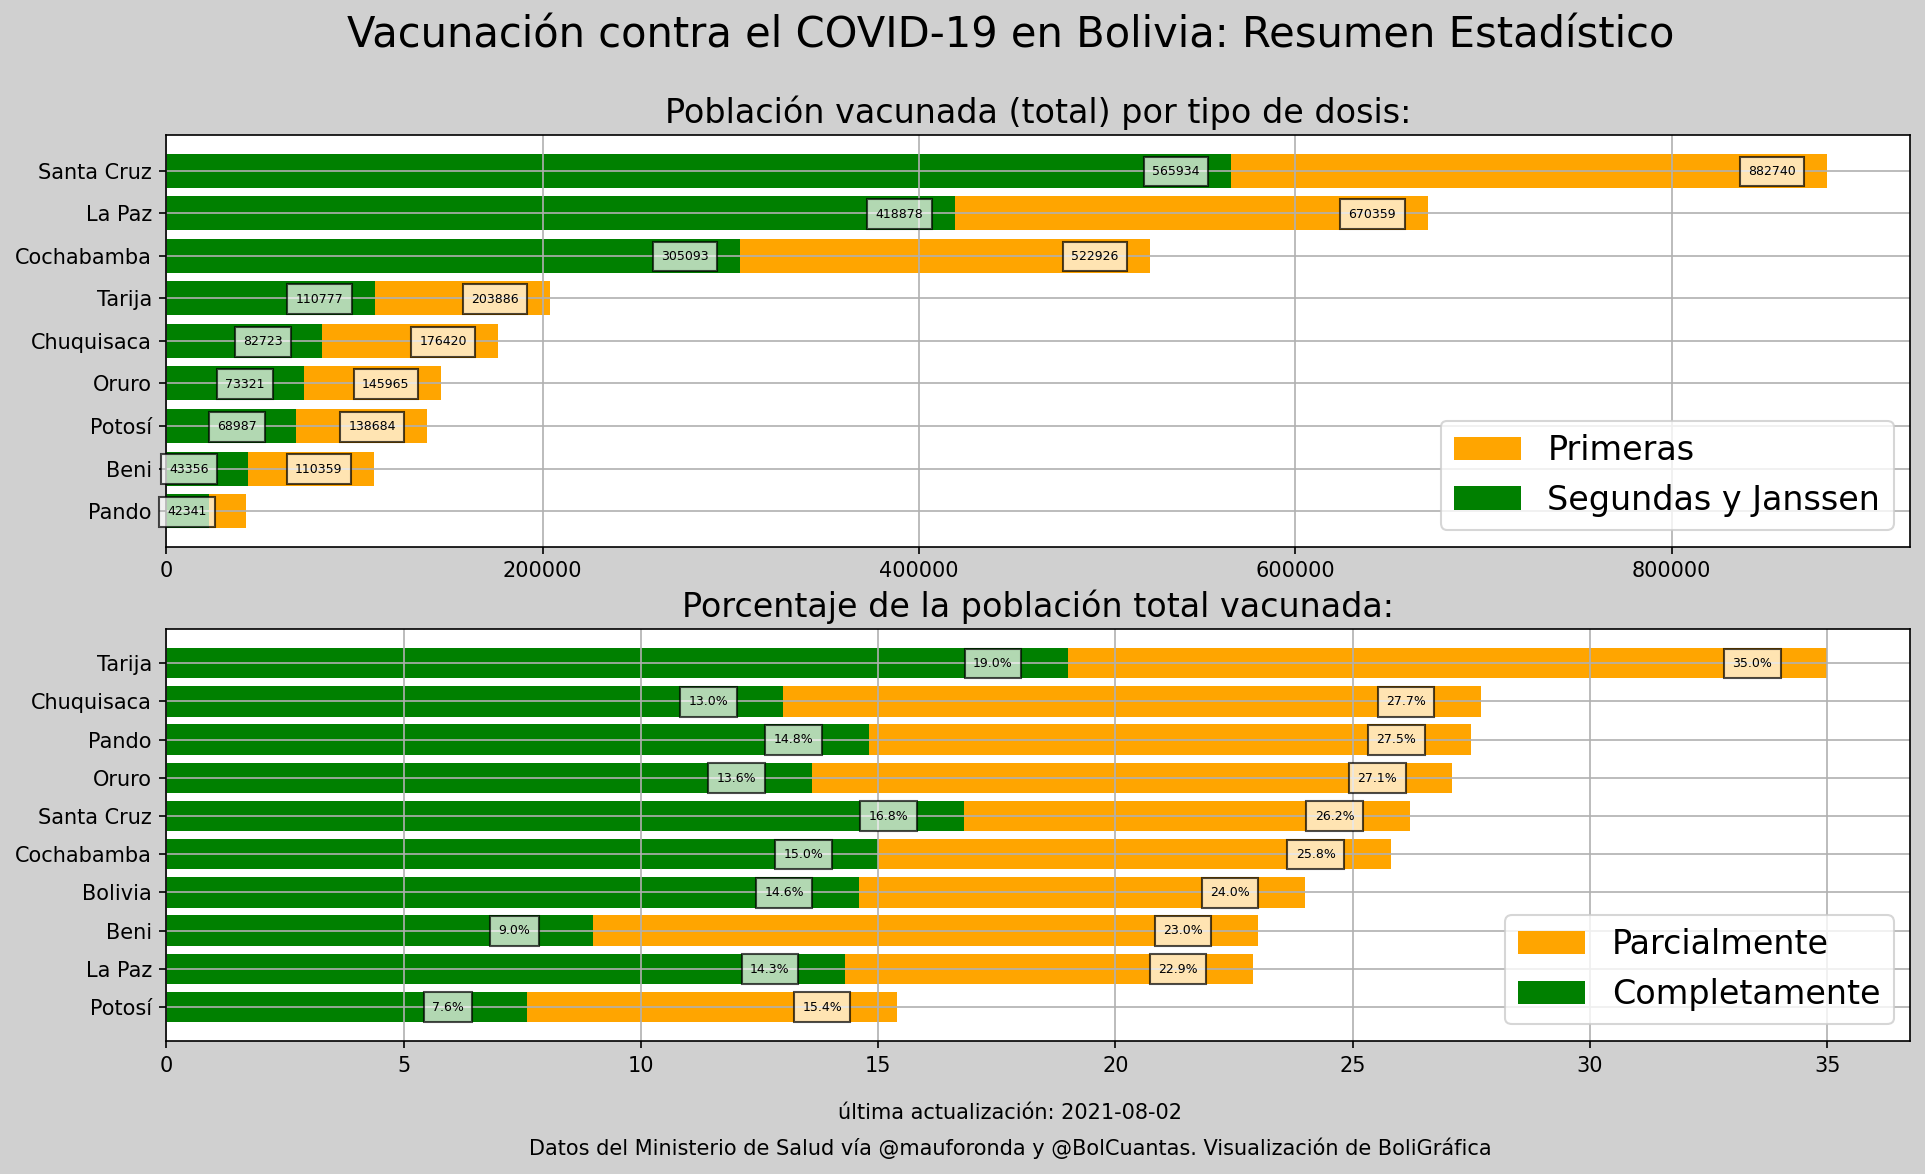

In [22]:
fig, axs = plt.subplots(2,1, figsize=(15,8),dpi=150)
axs=axs.flatten()

fig.suptitle("Vacunación contra el COVID-19 en Bolivia: Resumen Estadístico", fontsize=20)
fig.text(0.5,.06,horizontalalignment='center',s=ultima_actualizacion)
fig.text(0.5,0.03,horizontalalignment='center',s=atribucion, fontsize=10)

fig.set_facecolor(background_color1)

sort_primeras = primeras_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
sort_segundas = segundas_acum.iloc[-1,1:10].sort_values(ascending=True).fillna(0).astype(int)
axs[0].grid()
axs[0].set_title("Población vacunada (total) por tipo de dosis:", fontsize=16)
axs[0].barh(sort_primeras.index, sort_primeras, label="Primeras", color=color_vac_parcial2)
axs[0].barh(sort_segundas.index, sort_segundas, label="Segundas y Janssen", color=color_vac_completa2)
axs[0].legend(fontsize=16)
annotate_bar(sort_primeras,0, fontsize=6, y_offset=.3, x_offset=-42000, alpha=.7)



sort_primeras = primeras_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
sort_segundas = segundas_acum_pc.iloc[-1,:].sort_values(ascending=True).round(1)
axs[1].grid()
axs[1].set_title("Porcentaje de la población total vacunada:", fontsize=16)
axs[1].barh(sort_primeras.index, sort_primeras, label="Parcialmente", color=color_vac_parcial2)
axs[1].barh(sort_segundas.index, sort_segundas, label="Completamente", color=color_vac_completa2)
axs[1].legend(fontsize=16)
annotate_bar(sort_primeras,1, fontsize=6, y_offset=.3, x_offset=-2, alpha=.7, end_text="%")


fig.savefig(directory + "resumen_departamental.jpg", bbox_inches="tight")